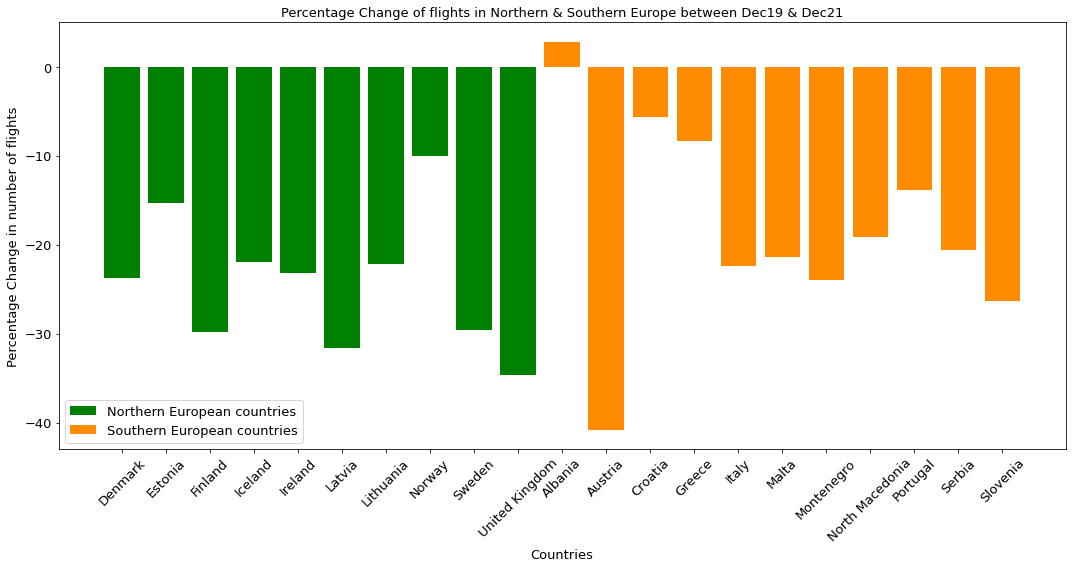

In [56]:
import pandas as pd
import numpy as np
#for bar charts
import matplotlib as mlp
import matplotlib.pyplot as plt

# import BarChart class from openpyxl.chart sub_module

from datetime import datetime

# Importing the data from file
# if to specify the any sheet of excel

#EUROPEAN COUNTRIES
from openpyxl import Workbook, load_workbook
wb = load_workbook('avia_tf_cm_spreadsheet.xlsx')
wb.active = wb["Sheet 1"]
ws = wb.active

values = []
number_of_flights = list(ws.rows)
for cell in number_of_flights[8]:
    values.append(cell.value)

values = values[2:]

while '' in values:
    values.remove('')

#northern & southern COUNTRIES
#import dataset
df = pd.read_excel("avia_tf_cm_spreadsheet.xlsx", sheet_name=2) #, header= None
rows, columns = df.shape

#define time, but actually not used 
time = df.loc[5,:]
time2=time.dropna(axis='rows')
time2=time2[2:]

df.replace('Germany (until 1990 former territory of the FRG)', 'Germany', inplace=True)
df.rename(columns={'Data extracted on 06/07/2022 20:44:02 from [ESTAT]': 'Countries', 'Unnamed: 1': 'Type'}, inplace=True)
#df.set_index('Countries', inplace=True) #wenn ich das tue, dann kann ich den Filter nicht mehr anwenden

#list with northern countries
northern_countries = ['Norway','Sweden','Denmark','Finland','Iceland','United Kingdom','Ireland','Lithuania','Latvia','Estonia']
southern_countries = ['Albania', 'Austria', 'Croatia', 'Greece', 'Italy', 'Malta', 'Montenegro', 'North Macedonia', 'Portugal', 'Serbia', 'Slovenia']

#percentage change
filt_northern_pc = (df['Countries'].isin(northern_countries)) & (df['Type'] == 'Percentage change compared to same month in 2019')
df_northerncountries_pc = df.loc[filt_northern_pc]

filt_southern_pc = (df['Countries'].isin(southern_countries)) & (df['Type'] == 'Percentage change compared to same month in 2019')
df_southerncountries_pc = df.loc[filt_southern_pc]

#delete nan values 
df_northerncountries_pc = df_northerncountries_pc.dropna(axis ='columns',)
df_southerncountries_pc = df_southerncountries_pc.dropna(axis ='columns',)

#percentage change from dec2019 to dec2021
pc_to_2019_northern = list( df_northerncountries_pc['Unnamed: 72']) #unnamed 72 is december 2021
countries_northern = list( df_northerncountries_pc['Countries'])

pc_to_2019_southern = list( df_southerncountries_pc['Unnamed: 72']) #unnamed 72 is december 2021
countries_southern = list( df_southerncountries_pc['Countries'])

#creating figure northern countries
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
fig1 = plt.bar(countries_northern, pc_to_2019_northern, color=('green'), label = 'Northern European countries')
fig2 = plt.bar(countries_southern, pc_to_2019_southern, color=('darkorange'), label = 'Southern European countries')
plt.title("Percentage Change of flights in Northern & Southern Europe between Dec19 & Dec21", fontsize=13)
plt.xlabel("Countries", fontsize=13)

plt.tick_params(axis='both', which='major', labelsize=7)
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.ylabel("Percentage Change in number of flights", fontsize=13)
plt.legend(fontsize=13)

plt.draw()
plt.savefig('barplot_percentage_change_south_north_EU_2019_to_2021.png', dpi = 700)
plt.show()

#absolute number of flights
#northern countries herausfiltern
filt = (df['Countries'].isin(northern_countries)) & (df['Type'] == 'Number')
df_northerncountries = df.loc[filt]

#delete nan values 
df_northerncountries = df_northerncountries.dropna(axis ='columns',)

#sum of all northern countries flights per month
number_of_flights_northern = list(df_northerncountries.sum(axis=0))
number_of_flights_northern = number_of_flights_northern[2:]

#northern flights
flights_northern = list(map(int, number_of_flights_northern))
#European flights
fligths = list(map(int, values))

# month and year
times = []
month_year_of_flight = list(ws.rows)
for cell in month_year_of_flight[6]:
    times.append(cell.value)

times= times[1:]

while None in times:
    times.remove(None)
    
new_list = []
list_2 = []
for i in times:
    new_list.append(datetime.strptime(i, '%Y-%m').date())
    
# putting in the correct format of month and year   
for i in new_list:
    list_2.append(datetime.strftime(i, '%b-%y'))
